## Panda Project group4 by Kenny Huang, Luis Garcia ,and Siming Gong

Kenny Huang, Luis Garcia ,and Siming Gong will use this New York City Leading Causes of Death | NYC Open Data (cityofnewyork.us) dataset about New York Leading causes of death. With this data set , we can find if there a correlation between sex , gender, age to a certain cause of death to high find the reason why there is a correlation, find if certain disease and illness have higher correlation with people's ethnicity to see if certain ethnicity have lesser medical help/abilities than others and others correlations to give reasons why they died to that specific cause of death.

##Addition Notes
This project was done on google colab to make it easy to share our work between each other and to work on the code at the same time.
##Instruction to Download the Datasest
1.   Click on this link:https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam/explore/query/SELECT%0A%20%20%60year%60%2C%0A%20%20%60leading_cause%60%2C%0A%20%20%60sex%60%2C%0A%20%20%60race_ethnicity%60%2C%0A%20%20%60deaths%60%2C%0A%20%20%60death_rate%60%2C%0A%20%20%60age_adjusted_death_rate%60%0AORDER%20BY%20%60year%60%20DESC%20NULL%20FIRST/page/filter
2.   To the right , next to the search bar , click on 'export' and then click on download. This should download a csv file named 'New_York_City_Leading_Causes_of_Death.csv' , you don't have to rename the file.
3. Put this file in your user dictionary





In [ ]:
#We had trouble finding the file in google colab so we used this code to find the file

#!!!Do not run this code if you are not on google colab!!!

from google.colab import files
uploaded = files.upload()


Saving New_York_City_Leading_Causes_of_Death.csv to New_York_City_Leading_Causes_of_Death.csv


In [ ]:
import pandas as pd

# creates df of New_York_City_Leading_Causes_of_Death
df = pd.read_csv('New_York_City_Leading_Causes_of_Death.csv')
df # print the df

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2019,All Other Causes,Female,Not Stated/Unknown,107,118.2908629,149.8962903
1,2019,Certain Conditions originating in the Perinata...,Female,Not Stated/Unknown,8,8.844176662,7.303764566
2,2019,Mental and Behavioral Disorders due to Acciden...,Female,Not Stated/Unknown,8,8.844176662,10.75357397
3,2019,Influenza (Flu) and Pneumonia (J09-J18),Female,Not Stated/Unknown,10,11.05522083,14.92955416
4,2019,"Accidents Except Drug Poisoning (V01-X39, X43,...",Female,Not Stated/Unknown,12,13.26626499,17.01829178
...,...,...,...,...,...,...,...
1798,2007,Diabetes Mellitus (E10-E14),F,Not Stated/Unknown,.,.,.
1799,2007,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Black Non-Hispanic,87,8.3,8.1
1800,2007,All Other Causes,F,Black Non-Hispanic,1230,116.8,113.4
1801,2007,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1523,178.7,229.4


In [ ]:
df.isnull().sum()#to show all how much missing data is in the data set

Year                         0
Leading Cause                0
Sex                          0
Race Ethnicity               0
Deaths                       0
Death Rate                 221
Age Adjusted Death Rate    221
dtype: int64

In [ ]:
df.dropna(inplace=True, axis=0)#to remove all the miss cell column
df.isnull().sum()


Year                       0
Leading Cause              0
Sex                        0
Race Ethnicity             0
Deaths                     0
Death Rate                 0
Age Adjusted Death Rate    0
dtype: int64

In [ ]:
#some data cell have '.' instead of 'nan', so we convert all '.' into 'nan'
n1 = float("nan")
df.loc[(df['Deaths']==".")]=n1
df.loc[(df['Death Rate']==".")]=n1
df.loc[(df['Age Adjusted Death Rate']==".")]=n1
df.dropna(inplace=True, axis=0)#to remove all the miss cell column

#the numbers in the original are string so we convert the numbers into proper types
df=df.astype({'Year':'int'})
df=df.astype({'Deaths':'int'})
df=df.astype({'Death Rate':'float'})
df=df.astype({'Age Adjusted Death Rate':'float'})
df.head(5)



,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2019,All Other Causes,Female,Not Stated/Unknown,107,118.290863,149.896290
1,2019,Certain Conditions originating in the Perinata...,Female,Not Stated/Unknown,8,8.844177,7.303765
2,2019,Mental and Behavioral Disorders due to Acciden...,Female,Not Stated/Unknown,8,8.844177,10.753574
3,2019,Influenza (Flu) and Pneumonia (J09-J18),Female,Not Stated/Unknown,10,11.055221,14.929554
4,2019,"Accidents Except Drug Poisoning (V01-X39, X43,...",Female,Not Stated/Unknown,12,13.266265,17.018292


In [ ]:
df.tail(5)#to show that in eariler years they used F and M for sex instead of male and female



,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
1797,2007,Influenza (Flu) and Pneumonia (J09-J18),M,Black Non-Hispanic,229,26.9,40.1
1799,2007,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Black Non-Hispanic,87,8.3,8.1
1800,2007,All Other Causes,F,Black Non-Hispanic,1230,116.8,113.4
1801,2007,Malignant Neoplasms (Cancer: C00-C97),M,Black Non-Hispanic,1523,178.7,229.4
1802,2007,Diabetes Mellitus (E10-E14),F,White Non-Hispanic,231,16.1,9.8


In [ ]:
# change the sex column to be more consistent
df.loc[df['Sex']=='M', ['Sex']] = 'Male'
df.loc[df['Sex']=='F', ['Sex']] = 'Female'

# change the race column to be more consistent
df.loc[df['Race Ethnicity']=='White Non-Hispanic', ['Race Ethnicity']] = 'Non-Hispanic White'
df.loc[df['Race Ethnicity']=='Black Non-Hispanic', ['Race Ethnicity']] = 'Non-Hispanic Black'

# change the Leading Cause column to be more consistent
df.loc[df['Leading Cause']=='Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)', ['Leading Cause']] = 'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)'

In [ ]:
pd.pivot_table(df, values="Deaths", index='Race Ethnicity', columns=['Leading Cause'])
#creates a pivot table  with death as value, race as rows and leading cause as columns


Leading Cause,"Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)",All Other Causes,Alzheimer's Disease (G30),"Assault (Homicide: U01-U02, Y87.1, X85-Y09)","Assault (Homicide: Y87.1, X85-Y09)",Cerebrovascular Disease (Stroke: I60-I69),Certain Conditions originating in the Perinatal Period (P00-P96),"Chronic Liver Disease and Cirrhosis (K70, K73)","Chronic Liver Disease and Cirrhosis (K70, K73-K74)",Chronic Lower Respiratory Diseases (J40-J47),...,Influenza (Flu) and Pneumonia (J09-J18),"Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)","Intentional Self-Harm (Suicide: X60-X84, Y87.0)",Malignant Neoplasms (Cancer: C00-C97),"Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)",Mental and Behavioral Disorders due to Use of Alcohol (F10),"Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)",Parkinson's Disease (G20),Septicemia (A40-A41),Viral Hepatitis (B15-B19)
Race Ethnicity,,,,,,,,,,,,,,,,,,,,,
Asian and Pacific Islander,48.846154,342.576923,40.000000,NaN,NaN,86.538462,18.5,22.166667,NaN,51.076923,...,86.769231,35.625,33.294118,549.576923,NaN,NaN,20.0,30.0,16.0,15.0
Hispanic,129.043478,1126.038462,149.545455,NaN,114.000000,176.653846,NaN,124.750000,129.000000,154.800000,...,203.884615,NaN,NaN,1132.500000,181.666667,NaN,NaN,NaN,49.0,NaN
Non-Hispanic Black,136.230769,1399.961538,126.909091,152.25,240.444444,241.730769,NaN,NaN,NaN,198.423077,...,252.461538,NaN,NaN,1675.230769,177.833333,NaN,82.9,NaN,89.0,NaN
Non-Hispanic White,222.692308,2195.153846,264.214286,NaN,NaN,340.384615,NaN,NaN,NaN,435.576923,...,530.423077,193.000,191.111111,3163.115385,245.150000,NaN,89.0,NaN,120.0,NaN
Not Stated/Unknown,14.666667,112.000000,6.000000,NaN,NaN,16.000000,13.0,NaN,12.666667,16.750000,...,13.750000,NaN,NaN,89.500000,17.666667,18.0,NaN,NaN,NaN,NaN


## Analysis of Death Comparison between Leading Cause and Race Ethnicity  in New York City
The pivot table shows the annual comparison of deaths between Race Ethnicity and Leading Cause in New York City based on the dataset. Key observation from the graph are as follows:
- **Variation of Death Count between Leading Cause and Race Ethnicity :** The pivot table show us that Non-Hispanic White	death count is at usually least double the death count of other race , which is likely due to population difference of white to other races in NYC. However , there are cause of death that is varies between race, meaning that it affect non-white population more or affecting white population less , which could have underlying  reason why this is happening.


In [ ]:
pd.pivot_table(df, values="Deaths", index='Year', columns=['Race Ethnicity'])
#creates a pivot table  with death as value, Year as rows and Race as columns


Race Ethnicity,Asian and Pacific Islander,Hispanic,Non-Hispanic Black,Non-Hispanic White,Not Stated/Unknown
Year,,,,,
2007,130.636364,399.318182,594.083333,1249.045455,NaN
2008,129.173913,424.045455,636.636364,1233.227273,NaN
2009,137.954545,399.043478,626.136364,1191.363636,NaN
2010,143.500000,424.545455,619.863636,1172.272727,NaN
2011,151.863636,426.863636,632.272727,1161.318182,NaN
2012,156.636364,428.181818,630.181818,1132.000000,NaN
2013,165.954545,439.636364,632.318182,1131.409091,NaN
2014,176.363636,440.318182,625.227273,1115.136364,NaN
2015,185.363636,462.818182,644.454545,1068.173913,NaN


## Analysis of Yearly Deaths Comparison between Race Ethnicity in New York City
The pivot table shows the annual comparison of deaths between Race Ethnicity in New York City based on the dataset. Key observation from the graph are as follows:
- **Increase Death Rate :** The pivot table show a trend of increased death count yearly for all ethincity except Non-Hispanic White. The increased death count can be attributed to the increased population of NYC as more people are in NYC , more people die. The decrease in Non-Hispanic White death count  warrent further investigation because the cause can be various reasons like better health care , better societal treatment , or age variation.
- **High Non-Hispanic White Death Count  :** The high Non-Hispanic White death count can be easily explain by saying that NYC have a high Non-Hispanic White population
- **Race Ethnicity Population Distribution  :** From the pivot table , we can assume that the ethnicity death count represent a portion of that actually ethnicity population. From this we can guess the estimate the population size of the ethnicity that from greatest to least population size: Non-Hispanic White,Non-Hispanic Black,Hispanic,Asian and Pacific Islander,Unknown.

In [ ]:
pd.pivot_table(df, values="Deaths", index='Race Ethnicity', columns=['Sex'])
#creates a pivot table  with death as value, Race as rows and Sex as columns


Sex,Female,Male
Race Ethnicity,,
Asian and Pacific Islander,152.692308,182.376712
Hispanic,429.076389,465.034965
Non-Hispanic Black,672.104167,601.354167
Non-Hispanic White,1173.993007,1090.597222
Not Stated/Unknown,36.818182,54.434783


## Analysis of Yearly Deaths Comparison between Sex and Ethnicity in New York City

The pivot table shows the annual comparison of deaths between Sex and Ethnicity in New York City based on the dataset. Key observations from the graph are as follows:

- **Consistent Sex Death:** On average , Males mostly have higher death count throughout the ethnicity by about 30 deaths, but for Non-Hispanic Black and Non-Hispanic White. Non-Hispanic Black and Non-Hispanic White females have a higher death count which reveal some interesting information because it means that there are some causes that breaks the pattern and made female have a higher death count. Which warrent further investigation to find the cause of why Non-Hispanic Black and Non-Hispanic White females have a higher death count.


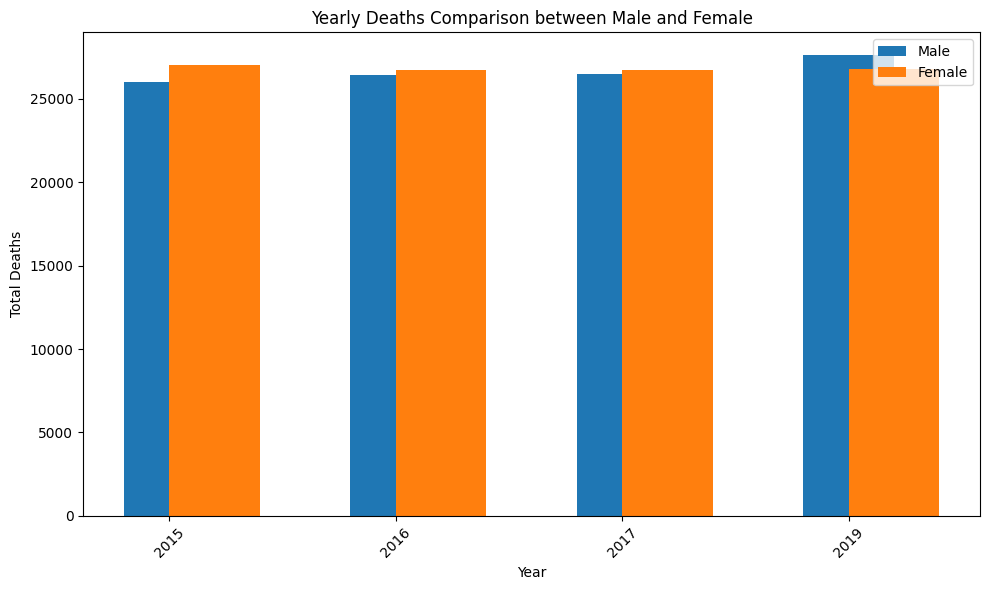

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Year' column to datetime format and display year in 4 digits
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.strftime('%Y')

# Filter the dataset for Male and Female separately
male_data = df[df['Sex'] == 'Male']
female_data = df[df['Sex'] == 'Female']

# Group by 'Year' and sum the 'Deaths' for Male and Female separately
male_yearly_deaths = male_data.groupby('Year')['Deaths'].sum()
female_yearly_deaths = female_data.groupby('Year')['Deaths'].sum()

# Plotting the comparison using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(male_yearly_deaths.index, male_yearly_deaths.values, width=0.4, align='center', label='Male')
plt.bar(female_yearly_deaths.index, female_yearly_deaths.values, width=0.4, align='edge', label='Female')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Yearly Deaths Comparison between Male and Female')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Analysis of Yearly Deaths Comparison between Male and Female in New York City

The line graph visualizes the annual comparison of deaths between male and female individuals in New York City based on the dataset. Key observations from the graph are as follows:

- **Female Mortality Rates:** Throughout the years, female deaths have consistently surpassed male deaths, indicating a higher mortality rate among females in New York City.
- **Trends over Time:** Both male and female death rates depict a gradual upward trend in the early years of the dataset, followed by a stabilization period from the mid-2000s to the late 2010s.
- **Relative Stability:** Although both genders display fluctuating trends in deaths across the years, the overall pattern remains relatively stable.
- **Differences in Peaks:** Female deaths show more significant spikes in certain years compared to male deaths, suggesting potential variations in health conditions or healthcare access among gender groups.
- **Consistent Gender Disparity:** The data consistently reflects higher mortality rates among females over the years, warranting further exploration into the underlying causes and social determinants influencing this gender disparity.



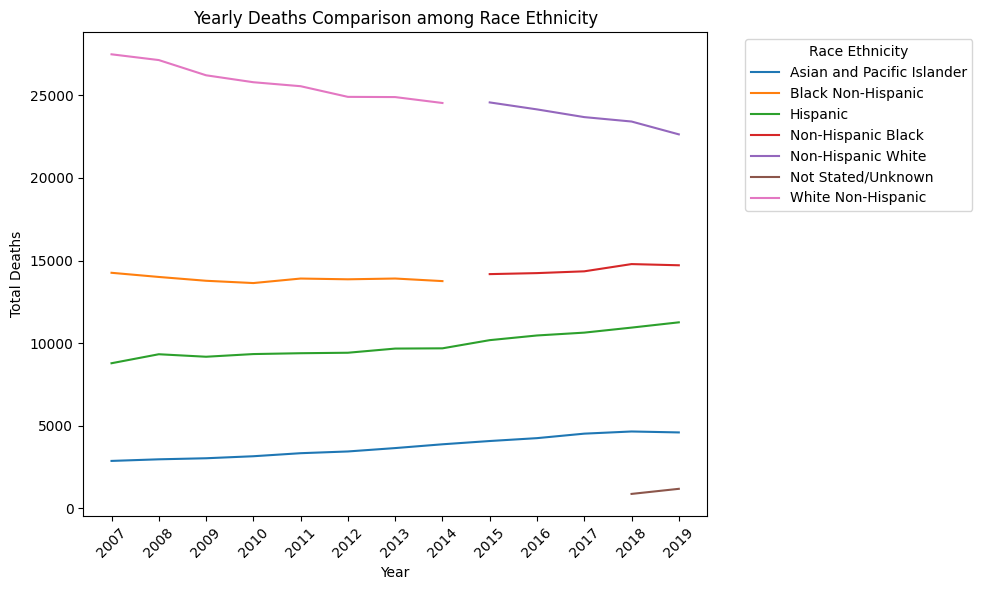

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Year' column to datetime format and display year in 4 digits
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.strftime('%Y')

# Group by 'Year' and 'Race Ethnicity', sum the 'Deaths' for each group
race_yearly_deaths = df.groupby(['Year', 'Race Ethnicity'])['Deaths'].sum().unstack()

# Plotting the comparison using a line graph
plt.figure(figsize=(10, 6))
for race in race_yearly_deaths.columns:
    plt.plot(race_yearly_deaths.index, race_yearly_deaths[race], label=race)

plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Yearly Deaths Comparison among Race Ethnicity')
plt.legend(title='Race Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Analysis of Yearly Deaths among Race Ethnicity in New York City

This line graph illustrates the yearly deaths across various Race Ethnicity groups in New York City from the available dataset. Several key observations can be made from the data:

- **White Non-Hispanic and Hispanic** groups consistently represent the highest number of deaths over the years. Both groups show an upward trend in the number of deaths until around 2016, after which a slight decline is noticeable.
- **Other Race/Ethnicity** category shows relatively low and inconsistent numbers of deaths compared to the two dominant groups.
- **Black Non-Hispanic** demonstrates a gradual increase in deaths until approximately 2012, followed by a decrease and then stabilization.
- There's a clear fluctuation in deaths among different Race Ethnicity groups throughout the years, indicating varying health trends or social factors influencing mortality rates among these demographics.
- From the mid-2010s onwards, there seems to be a general plateau or decline in deaths across all groups.




In [ ]:
# Grouping data by 'Race Ethnicity' and finding the highest leading cause for each group
highest_causes = df.groupby('Race Ethnicity')['Leading Cause'].agg(lambda x: x.value_counts().idxmax())

# Displaying the highest leading cause for each ethnicity
print(highest_causes)


Race Ethnicity
Asian and Pacific Islander                                     All Other Causes
Black Non-Hispanic            Human Immunodeficiency Virus Disease (HIV: B20...
Hispanic                         Diseases of Heart (I00-I09, I11, I13, I20-I51)
Non-Hispanic Black                                             All Other Causes
Non-Hispanic White                                             All Other Causes
Not Stated/Unknown                                             All Other Causes
Other Race/ Ethnicity                                          All Other Causes
White Non-Hispanic                        Malignant Neoplasms (Cancer: C00-C97)
Name: Leading Cause, dtype: object


## Findings: Highest Leading Causes of Death Across Ethnicity Groups in New York City

### Overview:
The analysis aimed to identify and visualize the primary cause of death prevalent within distinct ethnic groups across New York City. Pie charts were generated to illustrate the predominant cause of death within each ethnic group based on the provided dataset.

### Observations:
- **Hispanic Ethnicity:**  
  - The leading cause of death among the Hispanic ethnic group appears to be "Diabetes Mellitus (E10-E14)," representing approximately 28.5% of recorded deaths within this group.
  - Other prevalent causes are "Chronic Lower Respiratory Diseases" and "All Other Causes," accounting for 19.2% and 16.9% of deaths, respectively.

- **White Non-Hispanic Ethnicity:**  
  - For the White Non-Hispanic population, "Malignant Neoplasms (Cancer: C00-C97)" emerge as the most prevalent cause, constituting around 27.8% of total deaths.
  - This is followed by "Chronic Lower Respiratory Diseases" at approximately 23.2% and "All Other Causes" at 21.6%.

- **Other Race/Ethnicity:**  
  - Within this category, "Malignant Neoplasms (Cancer: C00-C97)" also dominate, accounting for 29.4% of deaths.
  - However, the data for this group may be more diverse, as the second most common cause, "Cerebrovascular Disease (Stroke: I60-I69)," accounts for only 11.8% of deaths.

### Conclusion:
The analysis reveals distinctive patterns of leading causes of death across different ethnic groups in New York City. While certain causes, such as cancers, prevail across multiple groups, others show considerable variability among ethnicities, indicating potential health disparities that warrant further investigation.

